# University of Houston faculty data

Create data frame using data from [The University of Houston website](https://www.uh.edu/ir/reports/statistical-handbook/student-enrollment/)

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Student data

In [2]:
year = [i for i in range(2014, 2025)]

year

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [3]:
# enrollment
total_faculty = [2316, #2014
                 2554, #2015
                 2617, #2016
                 2685, #2017
                 2757, #2018
                 2774, #2019
                 2837, #2020
                 3111, #2021
                 3259, #2022
                 3263, #2023
                 3468 #2024
                   ]
male = [1411, #2014
        1567, #2015
        1599, #2016
        1629, #2017
        1656, #2018
        1633, #2019
        1684, #2020
        1830, #2021
        1861, #2022
        1845, #2023
        1983 #2024
       ]
female = [905, #2014
          987, #2015
          1018, #2016
          1056, #2017
          1101, #2018
          1141, #2019
          1153, #2020
          1281, #2021
          1398, #2022
          1418, #2023
          1485 #2024
         ]

african_american = [109, #2014
                    109, #2015
                    117, #2016
                    136, #2017
                    154, #2018
                    176, #2019
                    196, #2020
                    218, #2021
                    254, #2022
                    258, #2023
                    303 #2024
         ]

asian_american = [296, #2014
                  325, #2015
                  337, #2016
                  347, #2017
                  353, #2018
                  382, #2019
                  416, #2020
                  512, #2021
                  576, #2022
                  603, #2023
                  706 #2024
         ]

hispanic = [185, #2014
          192, #2015
          203, #2016
          211, #2017
          227, #2018
          234, #2019
          257, #2020
          297, #2021
          313, #2022
          302, #2023
          345 #2024
         ]

white = [1566, #2014
          1761, #2015
          1772, #2016
          1763, #2017
          1787, #2018
          1794, #2019
          1763, #2020
          1858, #2021
          1863, #2022
          1828, #2023
          1845 #2024
         ]

## Create dataframes

In [4]:
c = ['Year', 'Total_faculty', 'Male', 'Female', 'African_American', 'Asian_American', 'Hispanic', 'White']

In [5]:
faculty = pd.DataFrame(list(zip(year, total_faculty, male, female, african_american, asian_american, hispanic, white)), columns = c)

In [6]:
faculty.head()

,Year,Total_faculty,Male,Female,African_American,Asian_American,Hispanic,White
0,2014,2316,1411,905,109,296,185,1566
1,2015,2554,1567,987,109,325,192,1761
2,2016,2617,1599,1018,117,337,203,1772
3,2017,2685,1629,1056,136,347,211,1763
4,2018,2757,1656,1101,154,353,227,1787


In [7]:
faculty.to_csv('Data/faculty.csv', index=False)

## Plotting 

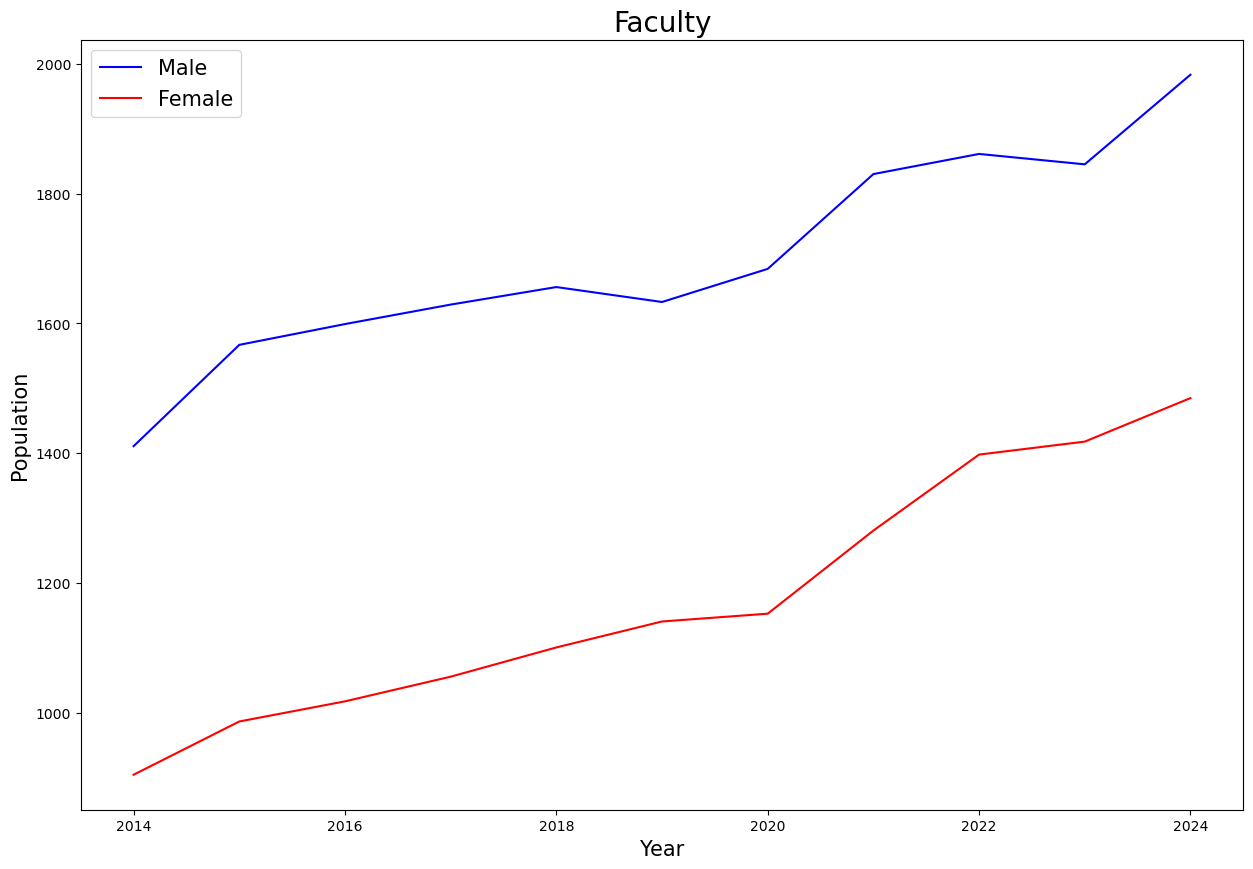

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(faculty.Year, faculty.Male, color = 'b', label = 'Male')
plt.plot(faculty.Year, faculty.Female, color = 'r', label = 'Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Faculty', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

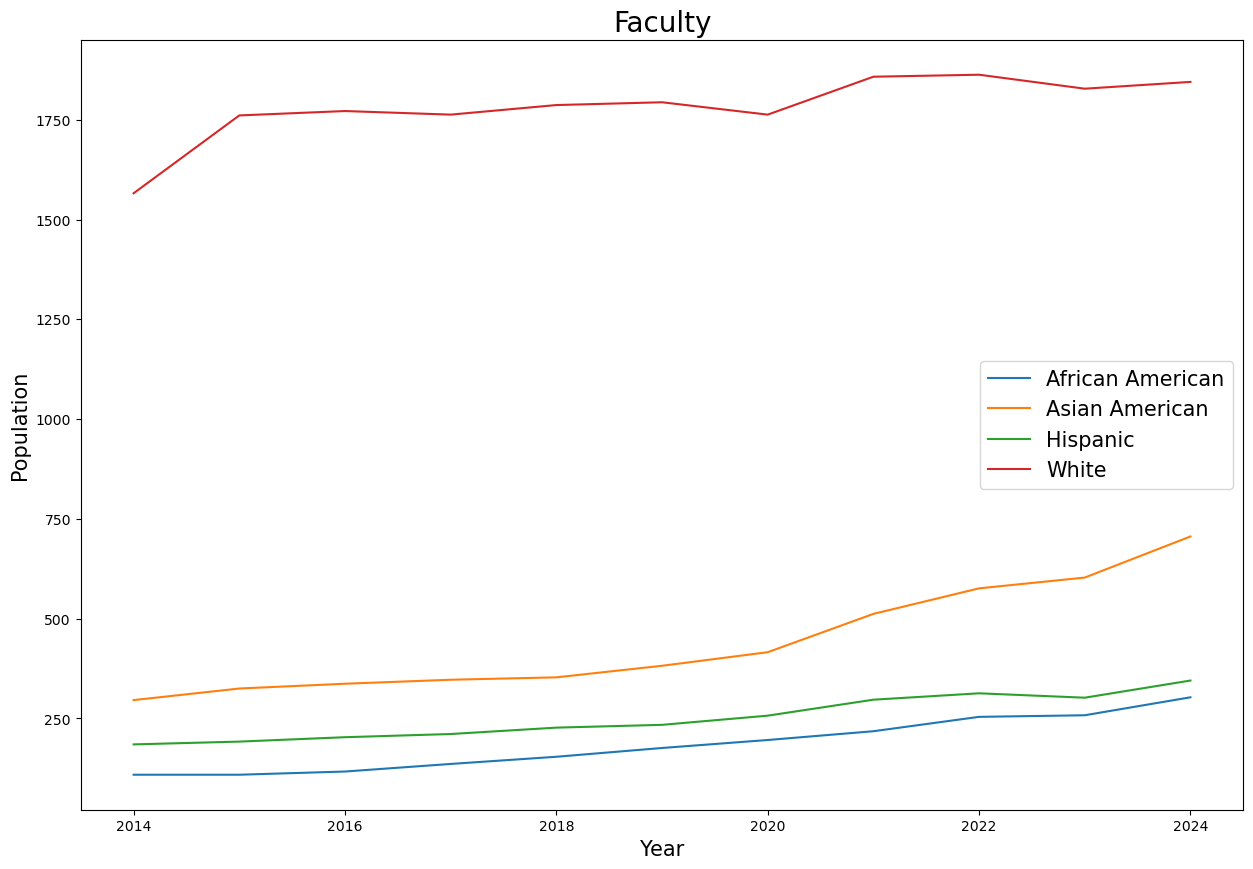

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(faculty.Year, faculty.African_American, label = 'African American')
plt.plot(faculty.Year, faculty.Asian_American, label = 'Asian American')
plt.plot(faculty.Year, faculty.Hispanic, label = 'Hispanic')
plt.plot(faculty.Year, faculty.White, label = 'White')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Faculty', fontsize=20)
plt.legend(fontsize = 15)
plt.show()